In [1]:
import tensorflow as tf
import torch
import tensorflow.keras as tk
import numpy as np
import seaborn as sb
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

print(f"{'Tensorflow Version':20s}: {tf.__version__}")
print(f"{'Keras Version':20s}:  {tk.__version__}")
print(f"{'Torch Version':20s}:  {torch.__version__}")
print(tf.config.experimental.list_physical_devices())

Tensorflow Version  : 2.16.1
Keras Version       :  3.3.3
Torch Version       :  2.5.0.dev20240621
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [48]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

In [52]:
dataset = raw_dataset.copy()
dataset.tail()
dataset = dataset.dropna()

In [53]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [61]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('MPG')
test_labels = test_features.pop('MPG')
train_dataset

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
146,28.0,4,90.0,75.0,2125.0,14.5,74,1
282,22.3,4,140.0,88.0,2890.0,17.3,79,1
69,12.0,8,350.0,160.0,4456.0,13.5,72,1
378,38.0,4,105.0,63.0,2125.0,14.7,82,1
331,33.8,4,97.0,67.0,2145.0,18.0,80,3
...,...,...,...,...,...,...,...,...
281,19.8,6,200.0,85.0,2990.0,18.2,79,1
229,16.0,8,400.0,180.0,4220.0,11.1,77,1
150,26.0,4,108.0,93.0,2391.0,15.5,74,3
145,32.0,4,83.0,61.0,2003.0,19.0,74,3


In [4]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [83]:
horsepower = np.array(train_features['Horsepower'])

horsepower_normalizer = tf.keras.layers.Normalization(axis=None)
horsepower_normalizer.adapt(horsepower)

In [158]:
horsepower_model = tf.keras.Sequential([
    horsepower_normalizer,
    tf.keras.layers.Dense(units=1)
])

horsepower_model.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_10                │ (None, 1)              │             3 │
│ (Normalization)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3 (16.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 3 (16.00 B)

In [159]:
horsepower_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [160]:
history = horsepower_model.fit(
    train_features['Horsepower'],
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

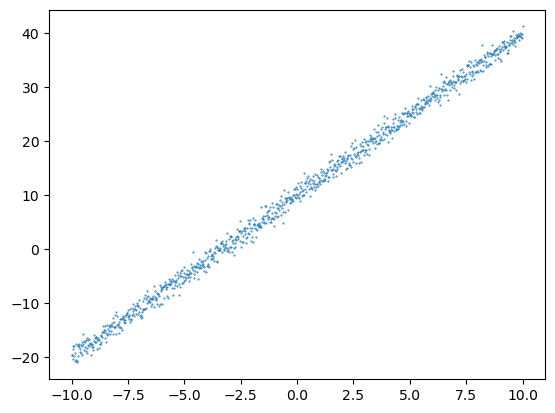

In [2]:
x = np.linspace(-10,10,1000)
y = 3.0*x+10.0+np.random.normal(size=1000)
plt.scatter(x, y, s=0.2)

In [6]:
# normalizer = tf.keras.layers.Normalization(axis=-1)
df = pd.DataFrame({"x":x})
normalizer.adapt(np.array(x))


normalizer_x = tf.keras.layers.Normalization(axis=None)
normalizer_x.adapt(x)

horsepower_model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])

horsepower_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [7]:
horsepower_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [8]:
history = horsepower_model.fit(
    df["x"],
    y,
    epochs=10,
    # Suppress logging.
    verbose=1,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

Epoch 1/10


2024-07-09 23:29:55.588030: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 11.2364 - val_loss: 16.0811
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.9806 - val_loss: 11.2300
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.5251 - val_loss: 4.4583
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.6398 - val_loss: 0.9656
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9009 - val_loss: 0.7648
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8176 - val_loss: 0.8239
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8488 - val_loss: 0.7790
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8356 - val_loss: 0.8031
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8552 - val_loss: 0.7732
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8368 - val_loss: 0.8111


In [9]:
y_pred = horsepower_model.predict(x)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [10]:
horsepower_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (32, 1)                │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8 (36.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6 (28.00 B)

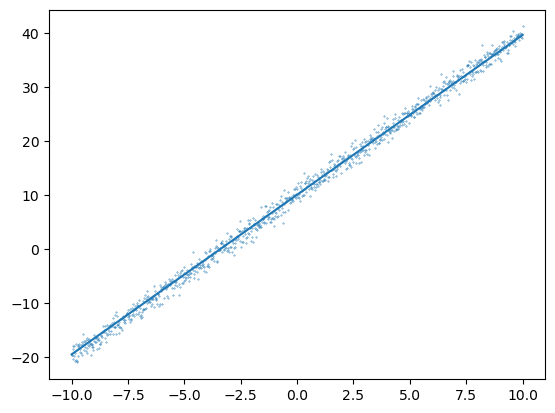

In [11]:
plt.scatter(x, y, s=0.1)
plt.plot(x, y_pred)

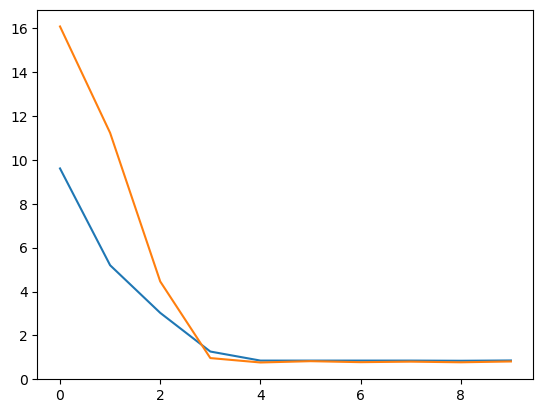

In [12]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')

In [170]:
print(horsepower_model.weights)

[<KerasVariable shape=(1, 1), dtype=float32, path=sequential_17/dense_20/kernel>, <KerasVariable shape=(1,), dtype=float32, path=sequential_17/dense_20/bias>]


In [191]:
horsepower_model.weights[1].value.read_value()

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([10.084483], dtype=float32)>

In [184]:
print(m,c)

<KerasVariable shape=(1, 1), dtype=float32, path=sequential_17/dense_20/kernel> <KerasVariable shape=(1,), dtype=float32, path=sequential_17/dense_20/bias>
